In [3]:
# # # Importing and splitting up the data
import numpy as np
import netCDF4 as nc
from netCDF4 import Dataset, MFDataset

# # Loading in the normalized dataset
all_input_data = np.array(nc.Dataset('cleaned_normalized_input_ds_2000_01_01_to_2018_12_31.nc','r').variables['data'][:])
all_target_data = nc.Dataset('cleaned_target_ds_2000_01_01_to_2018_12_31.nc', 'r').variables['data'][:]
all_input_max_norm = all_input_data
all_input_max_norm[all_input_max_norm < -4 ] = -4
all_input_max_norm[all_input_max_norm >  4 ] =  4
all_input_max_norm = all_input_max_norm/4
all_input_data = all_input_max_norm/4
del all_input_normalized

# selecting the random indices for training and testing
np.random.seed(22) # setting the seed
num_days = np.shape(all_target_data)
num_days = num_days[0]
all_indices = np.arange(0, num_days)
train_indices = np.random.choice(np.arange(0, num_days), size=int(np.floor(num_days*.9)), replace=False)
test_indices = np.setdiff1d(all_indices, train_indices)

train_input = all_input_data[train_indices,:,:,:,:]
train_target = all_target_data[train_indices,:]

test_input = all_input_max_norm[test_indices,:,:,:,:]
test_target = all_target_data[test_indices,:,]

print(np.shape(train_input))
print(np.shape(train_target))
print(np.shape(test_input))
print(np.shape(test_target))
print(np.max(all_input_max_norm))
print(np.min(all_input_max_norm))

(5916, 4, 100, 100, 5)
(5916, 287983)
(658, 4, 100, 100, 5)
(658, 287983)
1.0
-1.0


2024-05-09 00:14:00.688423: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-09 00:14:00.689100: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-09 00:14:00.692442: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-09 00:14:00.738490: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 00:14:01.839894: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4, 100, 100, 5) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d (Conv3D)                 │ (None, 4, 100, 100,    │           768 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 4, 100, 100,    │        16,512 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_2 (Conv3D)               │ (None, 2, 34, 34, 128) │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_3 (Conv3D)               │ (None, 2, 34, 34, 128) │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 34, 34, 128) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_4 (Conv3D)               │ (None, 1, 12, 12, 128) │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 12, 12, 128) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_6 (Conv3D)               │ (None, 1, 12, 12, 128) │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 287983)         │    74,011,631 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,076,975 (301.65 MB)

 Trainable params: 79,076,975 (301.65 MB)

 Non-trainable params: 0 (0.00 B)

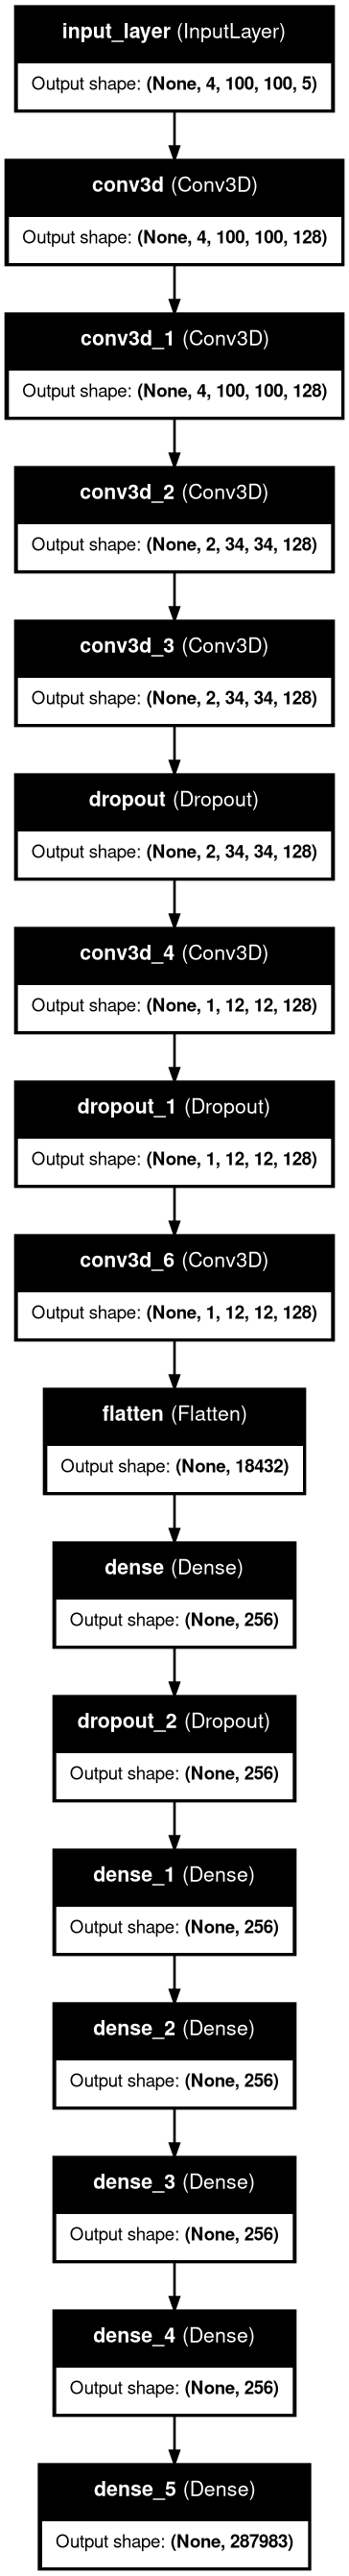

In [1]:
# # Creating the ConvD model
import tensorflow
import keras
from keras import layers
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, add
from tensorflow.keras.layers import Dropout, concatenate, Conv3DTranspose, Cropping2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model
import pydot

def Conv3D_model(input_shape, output_shape):
    # Define input layer
    inputs = tensorflow.keras.Input(shape=input_shape)

    # Convolutional layers
    conv1 = layers.Conv3D(128, 1, 1, activation='relu', padding='valid')(inputs)

    conv2 = layers.Conv3D(128, 1, 1, activation='relu', padding='valid')(conv1)

    conv3 = layers.Conv3D(128, 1, 3, activation='relu', padding='valid')(conv2)
    
    conv4 = layers.Conv3D(128, 1, 1, activation='relu', padding='valid')(conv3)
    conv4 = layers.Dropout(0.25)(conv4)

    conv5 = layers.Conv3D(128, 1, 3, activation='relu', padding='valid')(conv4)

    conv6 = layers.Conv3D(128, 1, 1, activation='relu', padding='valid')(conv5)
    conv6 = layers.Dropout(0.25)(conv5)

    conv7 = layers.Conv3D(128, 1, 1, activation='relu', padding='valid')(conv6)

    # Flatten layer
    flatten = layers.Flatten()(conv7)

    # Dense layers
    dense1 = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01))(flatten)
    dropout1 = layers.Dropout(0.5)(dense1)
    dense2 = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01))(dropout1)
    dense3 = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01))(dense2)
    dense4 = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01))(dense3)
    dense5 = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01))(dense4)
    
    # Output layer
    output = layers.Dense(output_shape[0])(dense5)

    # Define model
    model = tensorflow.keras.models.Model(inputs=inputs, outputs=output)
    return model

# Define input and output shapes
input_shape = (4, 100, 100, 5)
output_shape = (287983,)

# Create adjusted convolutional model
model = Conv3D_model(input_shape, output_shape)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# # Print model summary
model.summary()

# # Create an image of the model flowchart
plot_model(model, to_file='model_flow.png', show_shapes=True, show_layer_names=True, expand_nested=True, dpi=96)

Epoch 1/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 51s 991ms/step - loss: 442.0472 - mse: 142.7528 - val_loss: 165.4018 - val_mse: 89.9265
Epoch 2/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 46s 951ms/step - loss: 156.1564 - mse: 94.0162 - val_loss: 116.9835 - val_mse: 81.4475
Epoch 3/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 45s 926ms/step - loss: 129.7975 - mse: 97.4098 - val_loss: 108.1926 - val_mse: 82.4818
Epoch 4/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 47s 981ms/step - loss: 119.6756 - mse: 95.3240 - val_loss: 101.6755 - val_mse: 79.9490
Epoch 5/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 44s 918ms/step - loss: 112.2680 - mse: 91.0856 - val_loss: 100.1850 - val_mse: 80.3476
Epoch 6/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 44s 922ms/step - loss: 109.0276 - mse: 89.8303 - val_loss: 97.6334 - val_mse: 79.8496
Epoch 7/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 44s 921ms/step - loss: 100.9268 - mse: 83.1844 - val_loss: 96.8614 - val_mse: 79.8733
Epoch 8/500
48/48 ━━━━━━━━━━━━━━━━━━━━ 46s 951ms/step - loss: 121.7163 - mse: 104.7750 - val_loss: 94.1067 - val_mse: 7

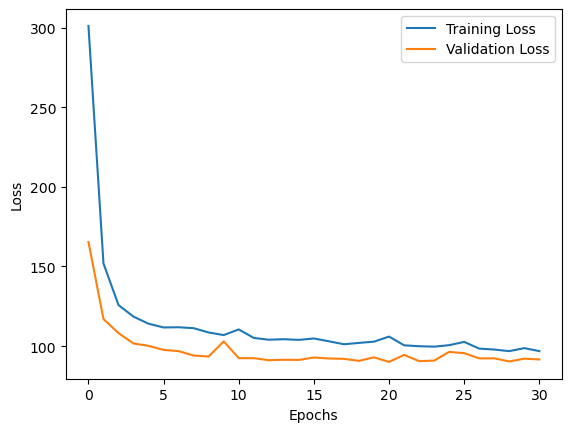

In [7]:
# Training the model

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=10,
                               restore_best_weights=True,
                               verbose=1)

# Train the model with callbacks
history = model.fit(train_input, 
                    train_target,
                    shuffle=True,
                    batch_size=100, 
                    epochs=500, 
                    validation_split=0.2, 
                    callbacks=early_stopping)

# Save the model
model.save("trained_Conv3D_model_04a.keras")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/1000
74/74 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - loss: 109.3509 - mse: 96.0001 - val_loss: 91.7009 - val_mse: 78.6665
Epoch 2/1000
74/74 ━━━━━━━━━━━━━━━━━━━━ 55s 738ms/step - loss: 98.8604 - mse: 86.2317 - val_loss: 91.6221 - val_mse: 79.1516
Epoch 3/1000
74/74 ━━━━━━━━━━━━━━━━━━━━ 55s 743ms/step - loss: 98.4267 - mse: 85.6105 - val_loss: 92.6870 - val_mse: 79.8949
Epoch 4/1000
74/74 ━━━━━━━━━━━━━━━━━━━━ 53s 720ms/step - loss: 96.5615 - mse: 83.6462 - val_loss: 92.7307 - val_mse: 79.6722
Epoch 5/1000
74/74 ━━━━━━━━━━━━━━━━━━━━ 54s 730ms/step - loss: 97.5708 - mse: 84.6690 - val_loss: 92.8954 - val_mse: 79.5554
Epoch 6/1000
74/74 ━━━━━━━━━━━━━━━━━━━━ 54s 729ms/step - loss: 104.0484 - mse: 90.8620 - val_loss: 89.9762 - val_mse: 77.7908
Epoch 7/1000
74/74 ━━━━━━━━━━━━━━━━━━━━ 52s 706ms/step - loss: 99.4443 - mse: 87.2662 - val_loss: 90.7511 - val_mse: 78.8039
Epoch 8/1000
74/74 ━━━━━━━━━━━━━━━━━━━━ 54s 734ms/step - loss: 95.9435 - mse: 84.1291 - val_loss: 91.0786 - val_mse: 79.5775
E

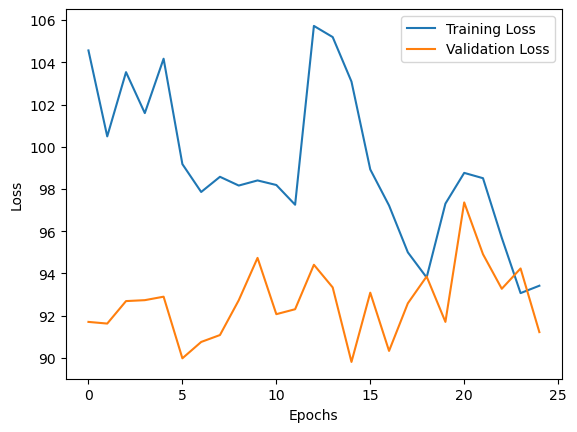

In [9]:
# Training the model from a saved version to continue the training
import tensorflow
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, MaxPooling3D, Flatten, Dense
from keras import layers
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, add
from keras.models import load_model
from tensorflow.keras.layers import Dropout, concatenate, Conv2DTranspose, Cropping2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model
import pydot

model = load_model("trained_Conv3D_model_04a.keras")

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=10, 
                               verbose=1)

# Train the model with callbacks
history = model.fit(train_input, 
                    train_target, 
                    batch_size=64, 
                    epochs=1000, 
                    validation_split=0.2, 
                    callbacks=early_stopping)

# Save the model
model.save("trained_Conv3D_model_04b.keras")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()